
Análise Exploratória dos Dados do Titanic (EDA)
# ==================================================

In [123]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/train.csv')

In [124]:
df.head()  # visualiza as 5 primeiras linhas

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [125]:
df.shape     # deve retornar numero de linhas x colunas   

(1309, 14)

In [126]:
df.columns     # lista os nomes das colunas

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [127]:
df.info()   # mostra tipo de dados e contagem não-nula por coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [128]:
df.describe()  # estatísticas descritivas para colunas numéricas

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Limpeza de dados
# ==================================================

In [129]:
df.drop(['ticket','cabin', 'name', 'boat', 'home.dest'], axis=1, inplace=True)  # remove colunas desnecessárias

In [130]:
df['age'].fillna(df['age'].median(), inplace=True) # preenche valores ausentes de idade com a mediana

/var/folders/q6/5p1bc37s5q98swf9z15w9k6m0000gn/T/ipykernel_15487/3436500322.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True) # preenche valores ausentes de idade com a mediana


In [131]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) # preenche valores ausentes de porto de embarque com o mais frequente

/var/folders/q6/5p1bc37s5q98swf9z15w9k6m0000gn/T/ipykernel_15487/273469093.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) # preenche valores ausentes de porto de embarque com o mais frequente


Análise Univariada e relações simples
# ==================================================

In [132]:
df['survived'].mean()
df['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='survived'>

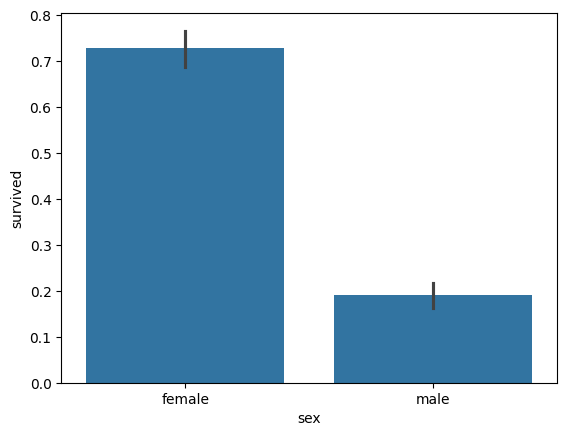

In [133]:
import seaborn as sns
sns.barplot(x='sex', y='survived', data=df)

In [134]:
df.groupby('pclass')['survived'].mean() # média de sobrevivência por classe

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

Modelagem Preditiva (Machine Learning) com scikit-learn
# ==================================================

In [135]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1}) # converte sexo para numérico

In [136]:
df = pd.get_dummies(df, columns=['embarked'], prefix='embarked') # converte porto de embarque para variáveis dummy

In [137]:
# Verifica e preenche valores faltantes restantes
df['fare'].fillna(df['fare'].median(), inplace=True) # preenche valores ausentes de tarifa com a mediana
df['body'].fillna(-1, inplace=True) # preenche valores ausentes de corpo com -1 (indica ausência)

/var/folders/q6/5p1bc37s5q98swf9z15w9k6m0000gn/T/ipykernel_15487/3218549724.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fare'].fillna(df['fare'].median(), inplace=True) # preenche valores ausentes de tarifa com a mediana
/var/folders/q6/5p1bc37s5q98swf9z15w9k6m0000gn/T/ipykernel_15487/3218549724.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the

In [138]:
x = df.drop('survived', axis=1) # seleciona todas as colunas exceto 'survived'
y = df['survived'] # seleciona a coluna 'survived' como alvo

In [139]:
from sklearn.model_selection import train_test_split # divide os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # divide os dados em 80% treino e 20% teste

In [ ]:
from sklearn.linear_model import LogisticRegression # cria o modelo de regressão logística
model = LogisticRegression(max_iter=1000, random_state=42) # treina o modelo com os dados de treino
model.fit(x_train, y_train) # avalia o modelo com os dados de teste

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [141]:
from sklearn.metrics import accuracy_score, confusion_matrix # calcula a acurácia e matriz de confusão
y_pred = model.predict(x_test) # faz previsões no conjunto de teste
acc = accuracy_score(y_test, y_pred) # calcula a acurácia
print(f"Acurácia no conjunto de teste: {acc:.3f}") # imprime a acurácia
print(confusion_matrix(y_test, y_pred)) # imprime a matriz de confusão

Acurácia no conjunto de teste: 0.786
[[127  17]
 [ 39  79]]
